### Features from project

1. CRIM--> per capita crime rate by town
2. ZN--> proportion of residential land zoned for lots over 25000 sq. ft.
3. INDUS--> proportion of non-retail business acres per town
4. CHAS--> Charles river dummy variable(=1 if tract bounds river; 0 otherwise
5. NOX--> nitirc oxides concentration( parts per 10 million)
6. RM--> average number of rooms per dwelling
7. AGE--> proportion of owner occupied units built prior to 1940
8. DIS--> weighted distances to five boston employment centres
9. RAD--> index of accessibility to radial highways
10. TAX--> full-value property-tax rate per 10000 dollers
11. PTRATIO--> pupil-teacher ratio by town
12. B--> 1000(Bk- 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT--> % lower status of the population
14. MEDV--> Median value of owner-occupied homes in $1000's

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
housing=pd.read_csv('housing.csv')

In [3]:
housing.head(5)

,CRIM,Zn,Indus,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.tail(5)

,CRIM,Zn,Indus,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
housing.shape

(506, 14)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   Zn       506 non-null    float64
 2   Indus    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [9]:
housing.describe()

,CRIM,Zn,Indus,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283417,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705050,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.202000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'Zn'}>,
        <AxesSubplot:title={'center':'Indus'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

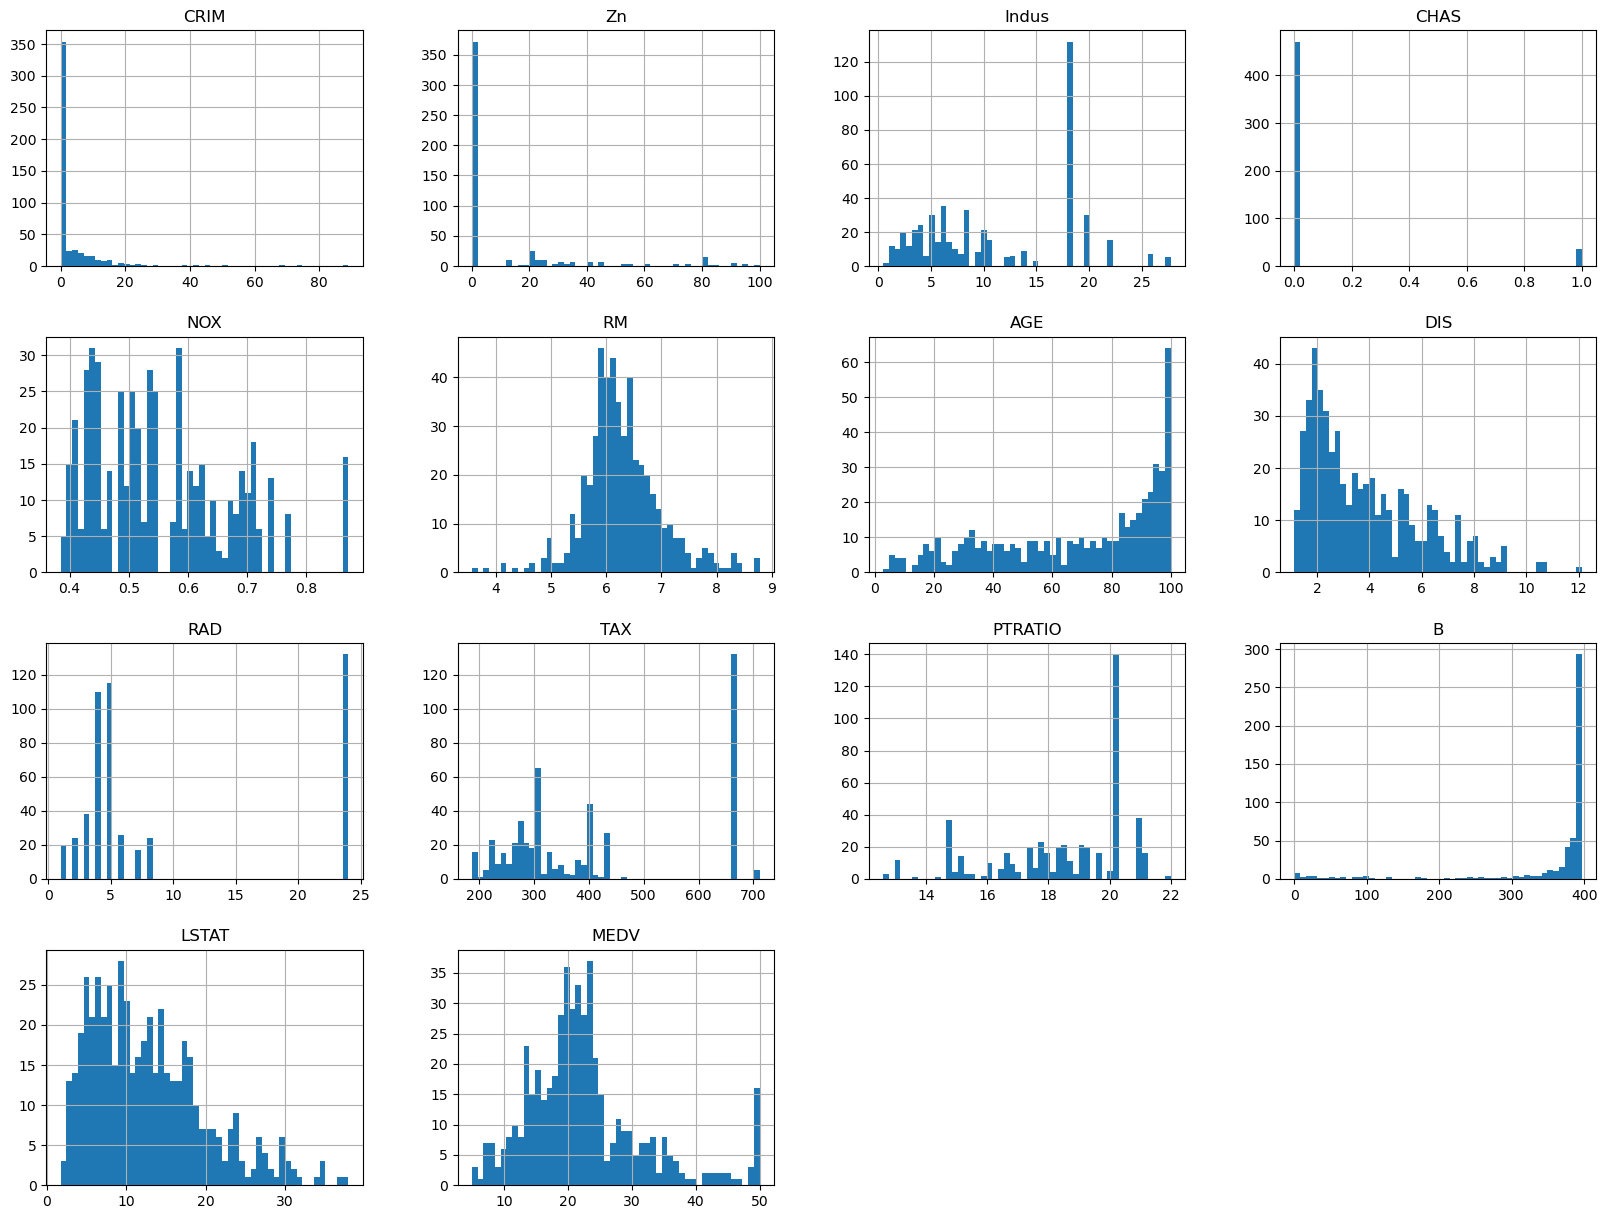

In [11]:
housing.hist(bins=50, figsize=(20,15))

### Train-test split

In [12]:
#For learning purpose
#import numpy as np

#def split_train_test(data, test_ratio):
    #np.random.seed(42) ## Fixed the shuffled values
    #shuffled= np.random.permutation(len(data))
    #print(shuffled)
    #test_set_size=int(len(data)*test_ratio)
    #test_indices=shuffled[:test_set_size]
    #train_indices=shuffled[test_set_size:]
    #return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
#train_set, test_set = split_train_test(housing, 0.2)

In [14]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set =train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [17]:
# Stratified sampling--> Train set and test set should represent the whole sample, A important feature should be distributed
# among train and test set equally--> CHAS value 1 and 0

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
strat_test_set

,CRIM,Zn,Indus,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [20]:
strat_test_set.describe()

,CRIM,Zn,Indus,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   Zn       102 non-null    float64
 2   Indus    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [22]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [23]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [24]:
# 95/7= 376/28

In [25]:
housing=strat_train_set.copy() # Now housing is train set

### Looking for correlations

In [26]:
corr_matrix=housing.corr()

In [27]:
corr_matrix['MEDV'].sort_values(ascending=False) #1--> Strong positive co-relation

MEDV       1.000000
RM         0.678951
B          0.361761
Zn         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
Indus     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='Zn', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='Zn', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='Zn'>,
        <AxesSubplot:xlabel='RM', ylabel='Zn'>,
        <AxesSubplot:xlabel='Zn', ylabel='Zn'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='Zn'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='Zn', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

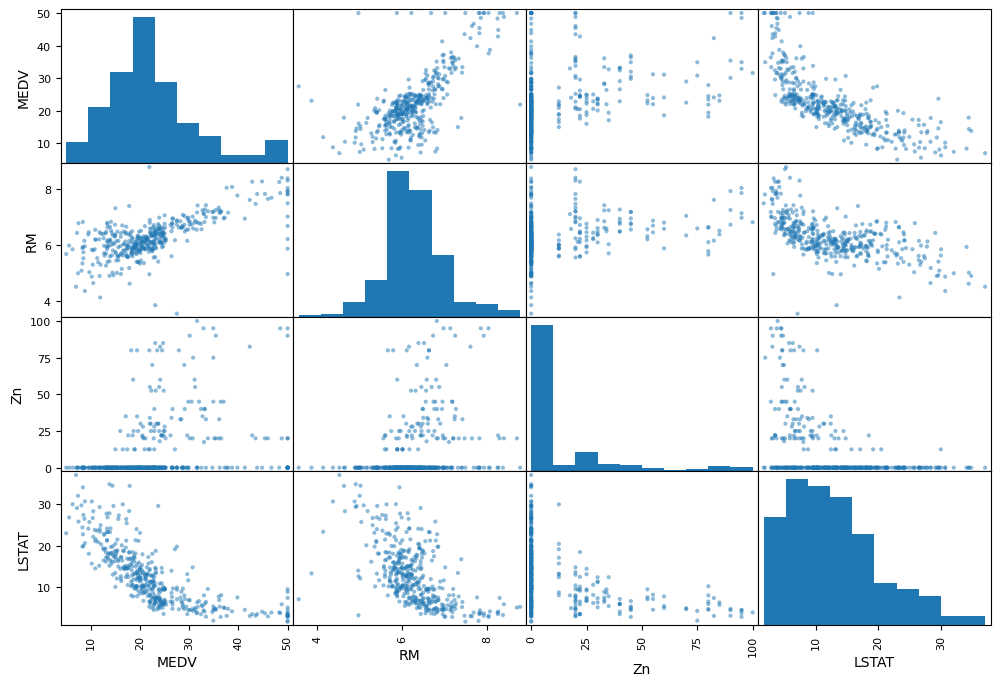

In [28]:
from pandas.plotting import scatter_matrix
attributes= ["MEDV","RM","Zn","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

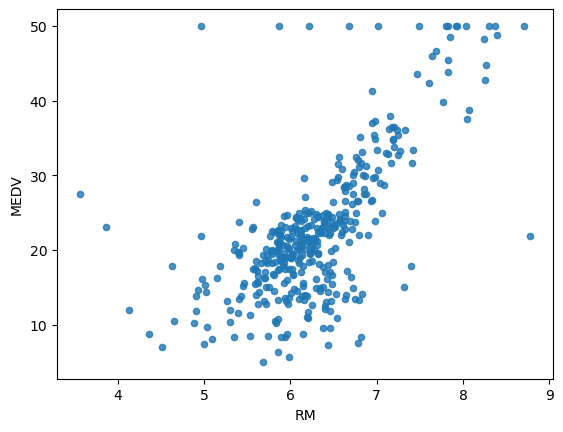

In [29]:
housing.plot(kind='scatter',x="RM", y="MEDV", alpha=0.8) # I can remove outliers to predict accurate data

### Trying out attributes combinations

In [30]:
## Attributes combination can further enhance our quality of data
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [31]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [32]:
housing.head()

,CRIM,Zn,Indus,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [33]:
corr_matrix=housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.678951
B          0.361761
Zn         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
Indus     -0.473516
PTRATIO   -0.493534
TAXRM     -0.523294
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

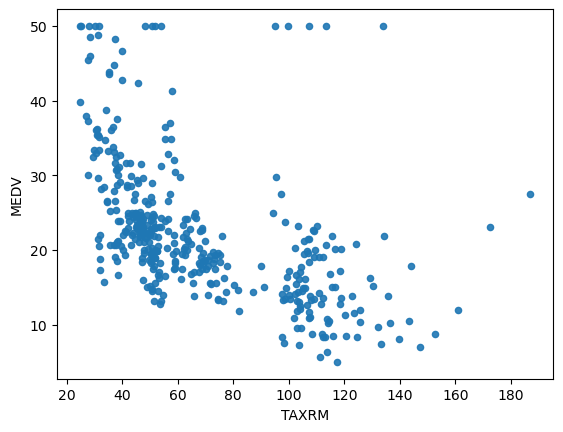

In [34]:
housing.plot(kind='scatter', x="TAXRM", y="MEDV", alpha=0.9)

In [35]:
# Separting features and labels
housing=strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set["MEDV"].copy()

#### Missing attributes

In [36]:
# To take care of missing attributes, you have three options:
#1. Get rid of the missing data points--> If such rows are less
#2. Get rid of the whole attribute --> If correlation is not that strong positive or negative
#3. Set the value to some value(0 or mean or median)--> 

In [37]:
a=housing.dropna(subset=["RM"])# Option 1

In [38]:
housing.shape

(404, 13)

In [39]:
a.shape

(399, 13)

In [40]:
housing.drop("RM",axis=1) # option 2
# Note that there is no RM Column and also note that the original housing dataframe will remain unchanged

,CRIM,Zn,Indus,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [41]:
median= housing["RM"].median() # Compute median for option 3

In [42]:
housing['RM'].fillna(median) #Option 3
# Original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [43]:
housing.shape

(404, 13)

In [44]:
housing.describe()# before we started filling missing attribute

,CRIM,Zn,Indus,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278321,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716111,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [46]:
imputer.statistics_ #Calculated the median for each column

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [47]:
X = imputer.transform(housing)

In [48]:
housing_tr=pd.DataFrame(X, columns=housing.columns) # Transformed dataset

In [49]:
housing_tr.describe()

,CRIM,Zn,Indus,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277463,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711696,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


### Scikit-Learn Design

### Primarily, three types of objects
#1. Estimators- It estimates some parameter based on a dataset. Eg. imputer
#It has a fit method and transform method
#Fit method- Fits the dataset and calculates internal parameters

#2. Transformers- transform method takes input and returns output based on the learnings from fit(). It also has a convenience 
#function called fit_transform() which fits and then transforms.

#3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives 
#score() function which will evaluate the predictions.

#### Feature Scaling

In [50]:
#Primarily two types of feature scaling methods:
   # 1. Min-max scaling(Normalization)
   # (value-min)/(max-min)
   # sklearn provides a class called MinMaxScaler for this
    
   # 2. Standardization
   #   (value - mean)/std (variance=1)
   #   Sklearn provides a class called StandardScaler for this

### Creating a Pipieline

In [51]:
from sklearn.pipeline import Pipeline #Pipeline--> Series of steps to automate
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # .... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [52]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)# Housing_tr has already imputer applied,
# housing will be have imputed in pipeline

In [53]:
housing_num_tr # It gives numpy array

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [54]:
housing_num_tr.shape

(404, 13)

### Selecting a desired model for Dragon real Estates

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=DecisionTreeRegressor()
#model=LinearRegression()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [56]:
some_data = housing.iloc[:5]

In [57]:
some_labels = housing_labels.iloc[:5]

In [58]:
prepared_data=my_pipeline.transform(some_data)

In [59]:
model.predict(prepared_data)

array([22.347, 25.817, 16.467, 23.357, 23.656])

In [60]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

### Evaluating the model

In [61]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)      
mse= mean_squared_error(housing_labels, housing_predictions)     
rmse=np.sqrt(mse)             

In [62]:
rmse #Overfitting, Noise read very accurately

1.20612559482628

#### I want the model to learn only trend not noise
### Using better Evaluation technique- Cross Validation

In [63]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores=np.sqrt(-scores)

In [64]:
rmse_scores

array([2.92033572, 3.17281429, 4.27205997, 2.50812551, 3.40526162,
       2.84368318, 4.60457783, 3.24316287, 2.88145434, 3.33665543])

In [65]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation", scores.std())

In [66]:
print_scores(rmse_scores)

Scores: [2.92033572 3.17281429 4.27205997 2.50812551 3.40526162 2.84368318
 4.60457783 3.24316287 2.88145434 3.33665543]
Mean: 3.318813075423166
Standard deviation 0.6188481678993845


### Saving the model

In [67]:
from joblib import dump,load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

### Testing the model on test data 

In [72]:
X_test= strat_test_set.drop("MEDV",axis=1)
Y_test= strat_test_set["MEDV"].copy()
X_test_prepared= my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse= mean_squared_error(Y_test, final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[24.756 11.732 25.124 21.819 18.321 15.006 19.803 14.594 31.647 41.401
 19.691 12.092 24.354 27.45  19.429 10.87  31.467 14.506 23.47  18.306
 20.091 17.808 17.082 22.07  18.875 31.473 16.562 33.525  9.126 33.656
 23.717 21.297 22.69  11.11  21.492 11.22  42.906 24.566 23.39  43.001
 23.982 29.772 20.318 20.987 19.236 33.318 44.687 20.197 20.261 21.73
 21.427 14.316 21.706 15.13  24.836 32.38  42.026 29.49  19.554 20.651
 46.201  9.521 19.037 26.09  14.504 33.301 20.327 17.848 19.168 34.449
 26.798 22.879 21.595 22.669 34.85  13.239 16.195 20.119 21.005 21.13
 22.838 20.787 14.184 22.56  20.866 21.126 14.498 21.418 21.797 23.357
 18.664 27.01   7.454 25.663 18.751 29.913 20.11  30.936 14.455 26.382
 21.627 20.583] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [70]:
final_rmse

2.872286496101368

In [73]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23840639, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

### Using the model

In [74]:
from joblib import dump,load
import numpy as np
model= load('Dragon.joblib')

features =np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23840639, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.347])